<a href="https://colab.research.google.com/github/MahparaBadar/Deep-Learning/blob/main/Image_Classification_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import zipfile
from google.colab import files
import matplotlib.pyplot as plt

In [3]:
# Define paths
zip_file_path = '/content/Image-Classification-Transfer-Learning-master.zip'
extract_dir = '/content/Image-Classification-Transfer-Learning-master'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [5]:
dataset_dir = os.path.join(extract_dir, 'Image-Classification-Transfer-Learning-master', 'Dataset')
train_dir = os.path.join(dataset_dir, 'training')
test_dir = os.path.join(dataset_dir, 'test')

In [6]:
# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1554 images belonging to 20 classes.


In [8]:

# ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith(('.jpg', '.png'))]


In [9]:
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    return img_array

In [10]:
test_images = [preprocess_image(path) for path in test_image_paths]
test_images = tf.concat(test_images, axis=0)

In [11]:
# Build the model
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 60,450,324 (230.60 MB)

 Trainable params: 60,306,580 (230.05 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [13]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=train_generator  # Use a portion of training data as validation data
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.5213 - loss: 1.8862 - val_accuracy: 0.9344 - val_loss: 0.2903
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9419 - loss: 0.2244 - val_accuracy: 0.9537 - val_loss: 0.1495
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9478 - loss: 0.1982 - val_accuracy: 0.9543 - val_loss: 0.1669
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9612 - loss: 0.1436 - val_accuracy: 0.9710 - val_loss: 0.1053
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9744 - loss: 0.0843 - val_accuracy: 0.9710 - val_loss: 0.0916
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9643 - loss: 0.1317 - val_accuracy: 0.9678 - val_loss: 0.1011
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9653 - loss: 0.1200 - val_accuracy: 0.9517 - val_loss: 0.1646
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9675 - loss: 0.1187 - val_accuracy: 0.9550 - val_loss: 0.1841
Ep

In [14]:
# Evaluate the model on training data (as test data isn't labeled)
loss, accuracy = model.evaluate(train_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 453ms/step - accuracy: 0.9861 - loss: 0.0590
Test Loss: 0.04657323658466339
Test Accuracy: 0.9890604615211487


In [15]:
# Predict on test images
predictions = model.predict(test_images)

16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 912ms/step


In [16]:
# Decode predictions
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[i] for i in predicted_classes]

In [17]:
# Print predictions
for image_path, label in zip(test_image_paths, predicted_labels):
    print(f"Image: {image_path}, Predicted label: {label}")

Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_682.jpg, Predicted label: lightbulb
Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_1494.jpg, Predicted label: calculator
Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_1622.jpg, Predicted label: lightbulb
Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_1713.jpg, Predicted label: lightbulb
Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_19.jpg, Predicted label: calculator
Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_884.jpg, Predicted label: calculator
Image: /content/Image-Classif

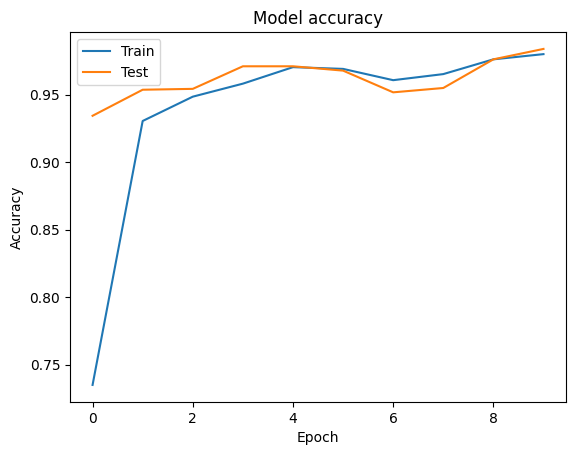

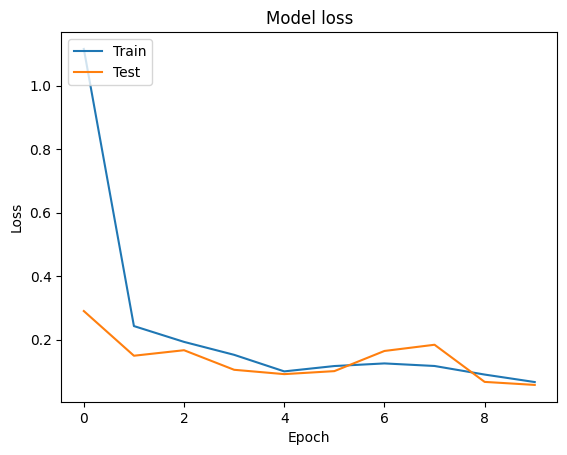

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
